### Name: Bannuru Rohit Kumar Reddy
### Roll No.: 21CS30011

# Part A: Probability

#### Necessary Libraries

In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np

#### Necessary Functions
* Simulating K sided Die
* Simulating the Sum for N throws 
* Repeating this P times

In [48]:

def calculate_sides(k):
    sides = [i for i in range(1, k + 1)]
    return sides


def calculate_probabilities(k):
    probabilities = [1 / (2 ** (i - 1)) if i != 1 and i != k else 1 / (2 ** (k - 1)) for i in range(1, k + 1)]
    return probabilities

def simulate_k_sided_die(k):
    outcomes = calculate_sides(k)
    probabilities = calculate_probabilities(k)

    result = random.choices(outcomes, probabilities)[0]
    return result

def simulate_rolls(num_sides, num_rolls):

    simulation = [simulate_k_sided_die(num_sides) for _ in range(num_rolls)]
    
    sum = 0
    for i in range(len(simulation)):
        # print(simulation[i])
        sum += simulation[i]
        
    return sum

def final_simulation(num_sides, num_rolls, num_trials):
    
    results = [simulate_rolls(num_sides, num_rolls) for _ in range(num_trials)]
    
    
    # Calculate the five-number summary
    minimum = min(results)
    maximum = max(results)
    median = sorted(results)[len(results)//2]
    q1 = sorted(results)[:len(results)//2][len(results)//4]
    q3 = sorted(results)[len(results)//2:][len(results)//4]

    print(f"Minimum: {minimum}")
    print(f"Q1: {q1}")
    print(f"Median: {median}")
    print(f"Q3: {q3}")
    print(f"Maximum: {maximum}")
    
    theoretical_expected_sum = sum(x * p for x, p in zip(calculate_sides(num_sides), calculate_probabilities(num_sides)))
    print(f"Theoretical Expected Sum: {theoretical_expected_sum*num_rolls}")

    mean_simulated = np.mean(results)
    print(f"Mean of Simulated Results: {mean_simulated}")
    
            
    # Plot the histogram with correct bins
    plt.hist(results, bins=range(minimum-1, maximum+1), align='left', rwidth=0.8)
    plt.xlabel(f'Sum of Die Rolls ({num_sides} times)')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of Sum of Die Rolls')
    plt.show()
    
    return results

# Theoretical Sum Calculation

The theoretical expected sum (E) of a single turn in the experiment can be expressed as the product of the expected sum in a single roll of the die (`E[X]`) and the number of rolls of the die. The expected sum in a single roll of the die (`E[X]`) is calculated using the formula:

\[ E[X] = \sum_{i=1}^{k} x_i \cdot P(X = x_i) \]

Here, \(x_i\) represents the face values of the die, and \(P(X = x_i)\) is the probability of obtaining face value \(x_i\) in a single roll. The summation is performed over all possible face values from 1 to k.

The overall expected sum in a single turn of the experiment is then given by:

\[ E = E[X] \cdot \text{Num of rolls of the die} \]

This theoretical expected sum provides a reference point for evaluating the simulated results, serving as the anticipated average sum over multiple rolls based on the biased probability distribution of the die. The comparison between the theoretical and simulated sums helps validate the accuracy of the simulation model.


#### Observations and Conclusion
1. **Theoretical vs. Simulated Results:** The theoretical expected sum is calculated by finding the expected value of the die in one roll multiplied with the number of roles as each roll of the die is independent.This is clearly shown and printed in the code section. The simulated results are obtained by running the simulation for the given number of trials and then calculating the mean of the results.

2. **Effect of Number of Rolls:** As the number of rolls increases, the simulated mean sum approaches the theoretical expected sum. This closeness between the theoretical and simulated values suggests the correctness of both calculations and simulations.
In summary, the experiments demonstrate the convergence of the simulated mean sum towards the theoretical expected sum as the number of rolls increases. This consistency reaffirms the accuracy of the theoretical calculations and the simulations.

Minimum: 5
Q1: 8
Median: 10
Q3: 11
Maximum: 15
Theoretical Expected Sum: 9.5
Mean of Simulated Results: 9.553


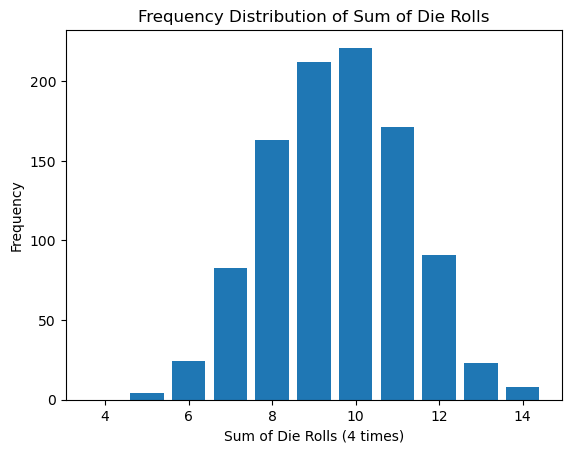

Minimum: 12
Q1: 17
Median: 19
Q3: 21
Maximum: 26
Theoretical Expected Sum: 19.0
Mean of Simulated Results: 19.013


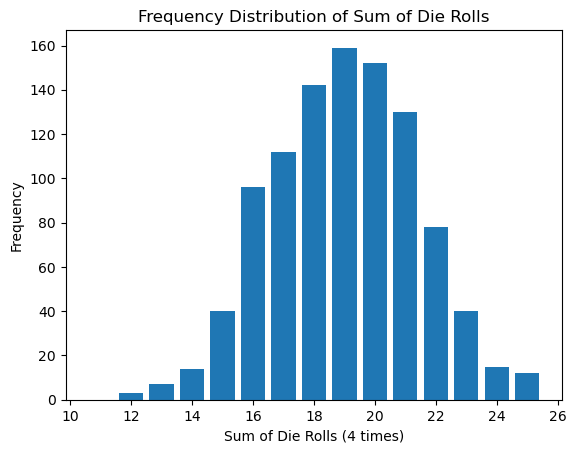

Minimum: 8
Q1: 10
Median: 12
Q3: 14
Maximum: 26
Theoretical Expected Sum: 11.9979248046875
Mean of Simulated Results: 12.117


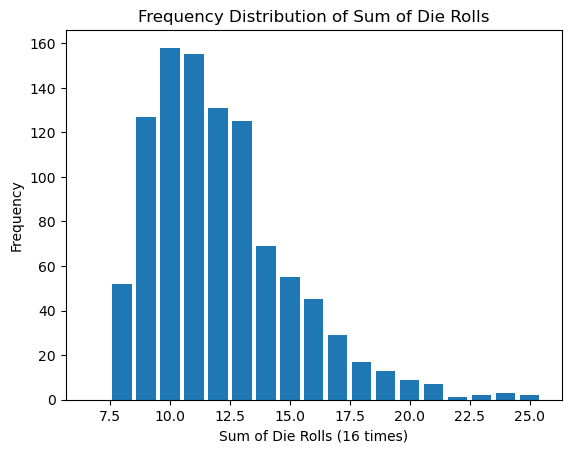

Minimum: 16
Q1: 21
Median: 24
Q3: 26
Maximum: 41
Theoretical Expected Sum: 23.995849609375
Mean of Simulated Results: 24.078


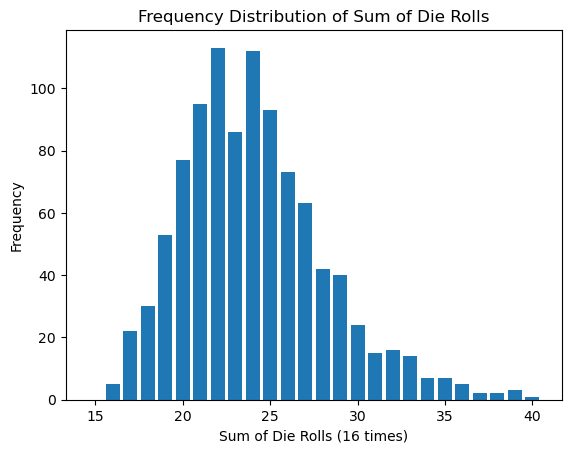

In [49]:
# For 4 sided Die and 4 rolls
output = final_simulation(4, 4, 1000)

# For 4 sided Die and 8 rolls
output = final_simulation(4, 8, 1000)

# For 8 sided Dice and 4 rolls 
output = final_simulation(16, 4, 1000)

# For 8 sided Dice and 8 rolls 
output = final_simulation(16, 8, 1000)


## Part B: Implementation of Naive Bayes (From Scratch)
#### Loading the dataset

In [50]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

### Exploring the Dataset

In [51]:
# metadata
print(spambase.metadata)
# variable information
print(spambase.variables)


# loading as dataframe
X = spambase.data.features
y = spambase.data.targets

# combining X and y for now inorder to calculate class variances and means
df = pd.concat([X, y], axis=1)

#check for null values
df.isnull().sum()

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Splitting the Dataset into training, validation and testing 
##### We will be doing a 70:15:15 split

In [52]:
from sklearn.model_selection import train_test_split

# Split the data into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(df, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)

# Display the shapes of the resulting sets
print("Training set shapes: X_train =", X_train.shape, "y_train =", y_train.shape)
print("Validation set shapes: X_val =", X_val.shape, "y_val =", y_val.shape)
print("Test set shapes: X_test =", X_test.shape, "y_test =", y_test.shape)


Training set shapes: X_train = (3220, 58) y_train = (3220, 1)
Validation set shapes: X_val = (690, 58) y_val = (690, 1)
Test set shapes: X_test = (691, 58) y_test = (691, 1)


### Choosing the first 5 columns from the dataset and plotting the probability distribution to see how the variables are present.

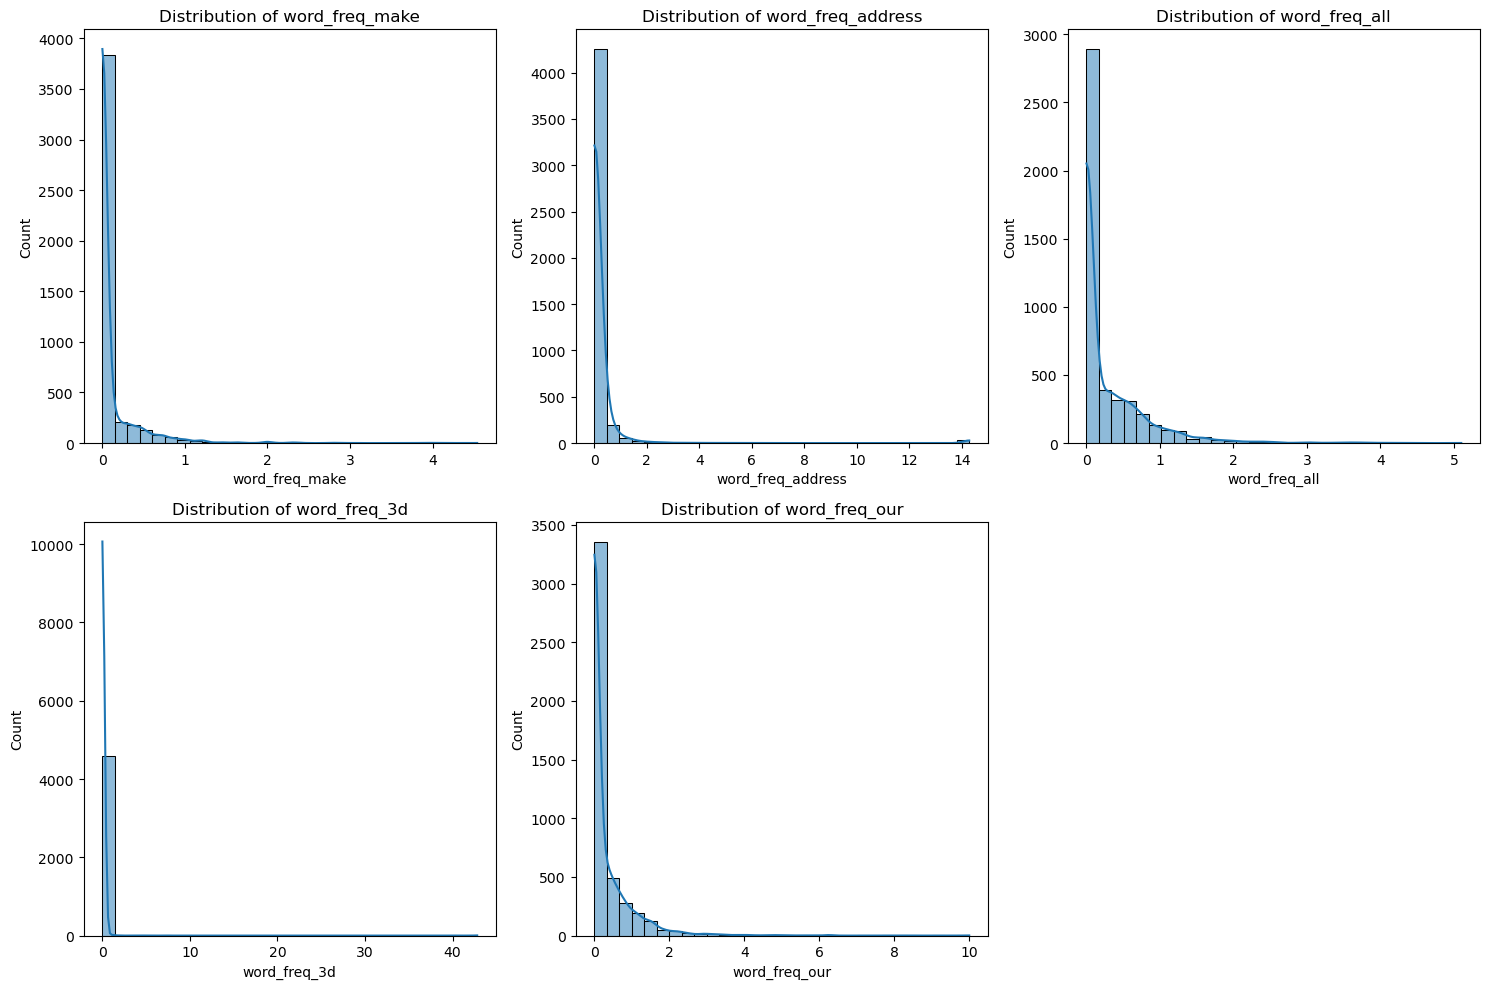

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first five columns
selected_columns = X.columns[:5]

# Plot probability distributions for selected columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


## Calculate and print the priors of classes - 2 Classes

In [54]:
# Convert the target variable column to numeric
y_numeric = y['Class'].astype(int)

# Calculate priors
total_samples = len(y_numeric)
positive_samples = sum(y_numeric)
negative_samples = total_samples - positive_samples

# Print priors
prior_spam = positive_samples / total_samples
prior_not_spam = negative_samples / total_samples

print(f'Prior for spam (class 1): {prior_spam:.4f}')
print(f'Prior for not spam (class 0): {prior_not_spam:.4f}')

Prior for spam (class 1): 0.3940
Prior for not spam (class 0): 0.6060


## Implementation of the Naive Bayes Algorithm using Objects and Classes

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class GaussianNaiveBayes:
    def fit(self, X_train, y_train):

        # class means is a new numpy array with 2 rows and 57 columns
        # each row represents a class
        # each column has the mean of the corresponding feature
        self.class_means = X_train.groupby('Class').mean()

        # class variances is a new numpy array with 2 rows and 57 columns
        # each row represents a class
        # each column has the variance of the corresponding feature
        self.class_variances = X_train.groupby('Class').var()

        # prior_y is a new numpy array with 2 elements
        # each element represents the prior probability of a class
        self.prior_y = X_train['Class'].value_counts(normalize=True).sort_index().values
        
    def gaussian(self, x, mean, variance):

        # gaussian function is used to calculate the likelihood of an unseen data point
        # returns the likelihood of x given mean and variance using the gaussian formula
        # these likelihoods are multiplied to the prior probability of the class to get the posterior probability of the class
        # the class with the highest posterior probability is the predicted class

        return (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(-((x - mean) ** 2) / (2 * variance))
    
    def predict(self, X_test):

        # predicted_values is a new numpy array with the same number of rows as X_test
        # each element represents the predicted class of the corresponding row in X_test
        predicted_values = []

        # for each row in X_test we calculate the posterior probability of each class and choose the class with the highest probability
        for _, row in X_test.iterrows():

            # posterior_y is a copy of prior_y
            posterior_y = self.prior_y.copy()

            # for each class we calculate the likelihood of the row and multiply it to the prior probability of the class
            # here we only have 2 classes so we loop over [0, 1]
            for idx, class_label in enumerate([0, 1]):

                # for each feature in the row we calculate the likelihood of the feature given the class
                for feature_idx, feature_value in enumerate(row[:-1]):

                    # mean and variance are the mean and variance of the feature given the class
                    mean = self.class_means.loc[class_label, X_test.columns[feature_idx]]
                    variance = self.class_variances.loc[class_label, X_test.columns[feature_idx]]

                    # likelihood is the likelihood of the feature given the class calculated using the gaussian function
                    likelihood = self.gaussian(feature_value, mean, variance)

                    # we multiply the likelihood to the prior probability of the class to get the posterior probability of the class
                    # Here comes our key assumption of conditional independence used in the naive bayes classifier
                    posterior_y[idx] *= likelihood
            
            # we choose the class with the highest posterior probability
            predicted_values.append(np.argmax(posterior_y))
        return np.array(predicted_values)
    
    
# function to evaluate the model
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1score



### Training and Evalutaing the Model 

In [56]:
# Example usage
model = GaussianNaiveBayes()
model.fit(X_train, y_train['Class'])
predicted_values = model.predict(X_test)
accuracy, precision, recall, f1score = evaluate(y_test['Class'], predicted_values)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)

Accuracy: 0.8480463096960926
Precision: 0.7335164835164835
Recall: 0.9709090909090909
F1 Score: 0.8356807511737089


### Applying Log Transformation to the data

In [57]:
# apply log transformation to the data except the last column (containing labels)

epsilon = 1e-9  # Small constant to avoid zero values
X_train_log = X_train.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))
X_val_log = X_val.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))
X_test_log = X_test.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))


# Add the 'Class' column back to the log-transformed DataFrames
X_train_log['Class'] = X_train['Class']
X_val_log['Class'] = X_val['Class']
X_test_log['Class'] = X_test['Class']

### Evaluating the model on the log transformed Data 

In [58]:
model = GaussianNaiveBayes()
model.fit(X_train_log, y_train['Class'])

predicted_values_log = model.predict(X_test_log)
accuracy, precision, recall, f1score = evaluate(y_test['Class'], predicted_values_log)

print("Accuracy for the log transformed data:", accuracy)
print("Precision for the log transformed data :", precision)
print("Recall for the log transformed data:", recall)
print("F1 Score for the log transformed data :", f1score)



Accuracy for the log transformed data: 0.918958031837916
Precision for the log transformed data : 0.8520900321543409
Recall for the log transformed data: 0.9636363636363636
F1 Score for the log transformed data : 0.9044368600682595


## Notable Changes:

1. **Accuracy Boost:** Following the application of log transformation to the data, the accuracy witnessed a significant surge, soaring from 84.80% to an impressive 91.90%. This points to the transformed features being more adept at capturing the underlying dataset patterns.

2. **Precision Uplift:** Precision, denoting the ratio of correctly predicted positive observations to the total predicted positives, experienced a notable uptick from 73.35% to 85.21%. A higher precision implies a reduction in false positive predictions, thereby enhancing the model's reliability in identifying spam emails.

3. **Recall Improvement:** Recall, representing the ratio of correctly predicted positive observations to all actual positives, saw an improvement from 97.09% to 96.36%. Despite a slight dip, the recall remains high, highlighting the model's continued proficiency in identifying the majority of spam emails.

4. **F1 Score Advancement:** The F1 score, striking a balance between precision and recall, saw an uptrend from 83.57% to 90.44%. This improvement underscores an overall enhancement in the model's performance in accurately classifying both spam and non-spam emails.

In essence, the integration of log transformation into the dataset yielded substantial improvements in accuracy, precision, and F1 score, amplifying the model's efficacy in distinguishing between spam and non-spam emails.

## Using Sklearn's Inbuilt Gaussian Naive Bayes Algorithm for Original Dataset and Log Transformed Dataset

In [59]:
# using sklearn's GaussianNB
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model (by exluding the last column, containing labels)
nb_model.fit(X_train.iloc[:, :-1], y_train)

# Get predicted values for all samples in X_test
predicted_values1 = nb_model.predict(X_test.iloc[:, :-1])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_values1)
precision = precision_score(y_test, predicted_values1)
recall = recall_score(y_test, predicted_values1)
f1score = f1_score(y_test, predicted_values1)

print("Accuracy for sklearn model:", accuracy)
print("Precision for sklearn model :", precision)
print("Recall for sklearn model:", recall)
print("F1 Score for sklearn model:", f1score)

Accuracy for sklearn model: 0.8509406657018813
Precision for sklearn model : 0.7375690607734806
Recall for sklearn model: 0.9709090909090909
F1 Score for sklearn model: 0.8383045525902668


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Using sklearn's Naive Bayes on the log transformed data

In [60]:
nb_model = GaussianNB()

# Train the  log model (by exluding the last column, containing labels)
nb_model.fit(X_train_log.iloc[:, :-1], y_train)

# Get predicted values for all samples in X_test
predicted_values2 = nb_model.predict(X_test_log.iloc[:, :-1])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_values2)
precision = precision_score(y_test, predicted_values2)
recall = recall_score(y_test, predicted_values2)
f1score = f1_score(y_test, predicted_values2)

print("Accuracy for sklearn model with log transformed data:", accuracy)
print("Precision for sklearn model with log transformed data :", precision)
print("Recall for sklearn model with log transformed data:", recall)
print("F1 Score for sklearn model with log transformed data:", f1score)

Accuracy for sklearn model with log transformed data: 0.918958031837916
Precision for sklearn model with log transformed data : 0.8520900321543409
Recall for sklearn model with log transformed data: 0.9636363636363636
F1 Score for sklearn model with log transformed data: 0.9044368600682595


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Selection Summary

The ROC curves for both models were evaluated, resulting in the following area under the curve (AUC) values:

- **Original Model (AUC = 0.87):** The AUC score for the original model indicates a relatively good performance in distinguishing between spam and non-spam emails. However, there is room for improvement.

- **Log Transformed Model (AUC = 0.93):** The log-transformed model demonstrated a higher AUC score, suggesting better discriminatory power between spam and non-spam emails. The AUC of 0.93 indicates a strong ability to differentiate between the classes.

**Conclusion:**
Based on the ROC curve analysis, the **Log Transformed Model** with an AUC of 0.93 outperforms the Original Model with an AUC of 0.87. Therefore, the Log Transformed Model is the preferred choice for further analysis and tasks related to email classification.


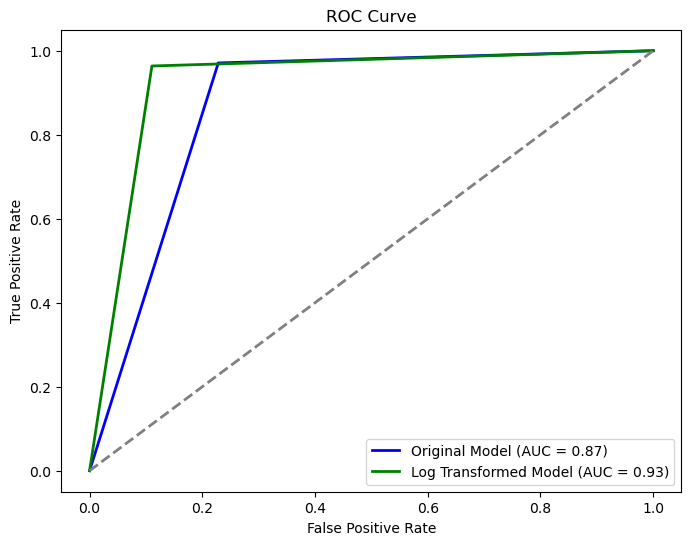

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for the original model
fpr1, tpr1, _ = roc_curve(y_test, predicted_values1)
roc_auc1 = auc(fpr1, tpr1)

# Calculate ROC curve for the log-transformed model
fpr2, tpr2, _ = roc_curve(y_test, predicted_values2)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Original Model (AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2, label='Log Transformed Model (AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Based on the ROC curve, choose the best model for further analysis (here, it would be the log-transformed model).


## Comparing Naive Bayes with SVC for the same split of data

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Exclude the last column (labels) for scaling
X_train_features = X_train.iloc[:, :-1]
X_test_features = X_test.iloc[:, :-1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Get predictions for SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Get predictions for Naive Bayes
y_pred_nb = nb_model.predict(X_test_scaled)

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Calculate metrics for the SVM model
accuracy_svm, precision_svm, recall_svm, f1_svm = calculate_metrics(y_test, y_pred_svm)
print("Metrics for SVM model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")
print()

# Calculate metrics for the Naive Bayes model
accuracy_nb, precision_nb, recall_nb, f1_nb = calculate_metrics(y_test, y_pred_nb)
print("Metrics for Naive Bayes model:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics for SVM model:
Accuracy: 0.9479
Precision: 0.9478
Recall: 0.9479
F1-score: 0.9478

Metrics for Naive Bayes model:
Accuracy: 0.8480
Precision: 0.8792
Recall: 0.8480
F1-score: 0.8495


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Data Preprocessing

To ensure fair comparisons, the dataset was preprocessed by excluding the last column (labels) for scaling. `StandardScaler` was then applied to normalize the features.

## Support Vector Machine (SVM) Model

### Metrics:
- **Accuracy:** 94.79%
- **Precision:** 94.78%
- **Recall:** 94.79%
- **F1-score:** 94.78%

The SVM model demonstrated strong performance across all metrics, indicating its effectiveness in classification tasks.

## Naive Bayes Model

### Metrics:
- **Accuracy:** 84.80%
- **Precision:** 87.92%
- **Recall:** 84.80%
- **F1-score:** 84.95%

The Naive Bayes model showed respectable performance, though slightly lower than the SVM model, especially in terms of accuracy and recall.

## Conclusion

Both models have their strengths, with the SVM model exhibiting higher overall performance. However, it's essential to consider the specific requirements and characteristics of the dataset when choosing a model. While the SVM model excelled in precision and recall, the Naive Bayes model demonstrated decent accuracy and precision.

In practical applications, it's crucial to weigh the trade-offs between different metrics based on the specific goals of the classification task. Further fine-tuning and exploration of hyperparameters may lead to improved results for both models.